/Users/victor/miniconda3/envs/env1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[-3 -3]
 [ 4  2]
 [-2  6]]


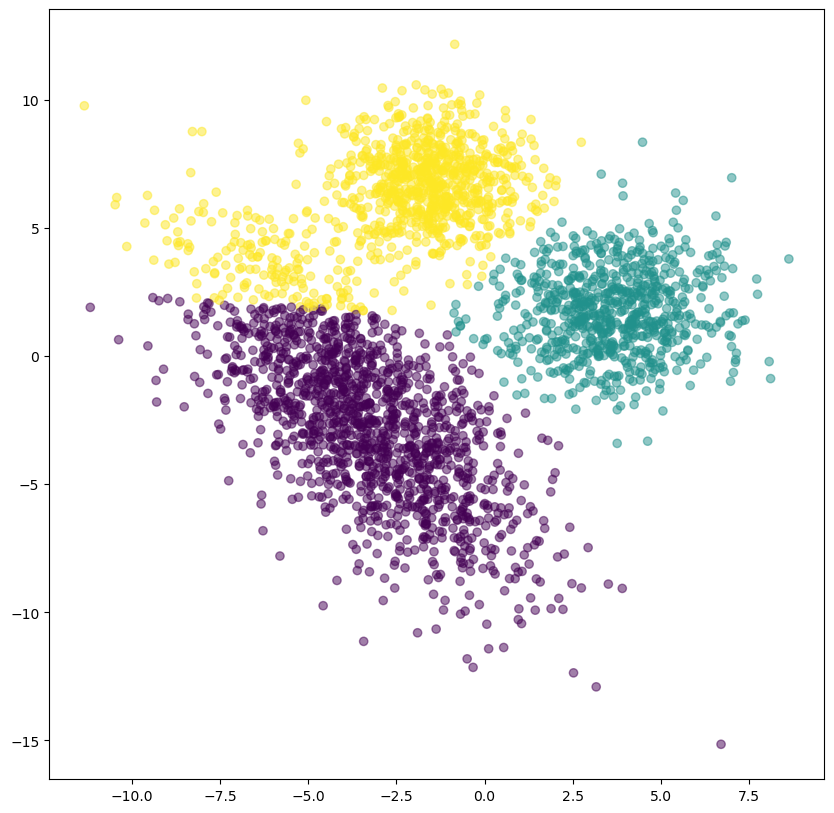

[0 1 2]
[1324  742  934]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
#plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
#plt.show()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

k_means = KMeans(init="k-means++", n_clusters=3, random_state=42)
k_means.fit(X)
print(np.round(k_means.cluster_centers_).astype(int))
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

_, counts = np.unique(k_means_pred, return_counts=True)
print(_)
print(counts)
